# Empirical Evidence for the LogReturn Independent Normal Hypothesis
**Bryan Chen**


In [1]:
import numpy as np
import pandas as pd
import akshare as ak
# 读入华中数控（300161）的价格数据
df = ak.stock_zh_a_hist(symbol="300161", period="daily", start_date="20220101", end_date="20240101")
df.head()

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2022-01-04,30.00,31.30,31.95,29.27,142479,433216544.0,8.89,3.85,1.16,8.48
1,2022-01-05,30.80,29.78,30.80,29.55,102242,307890704.0,3.99,-4.86,-1.52,6.09
2,2022-01-06,29.59,29.47,30.58,29.39,80144,239942009.0,4.00,-1.04,-0.31,4.77
3,2022-01-07,29.06,28.60,29.70,28.40,73997,215343477.0,4.41,-2.95,-0.87,4.40
4,2022-01-10,28.55,29.29,29.32,28.11,58421,169523855.0,4.23,2.41,0.69,3.48


这是从akshare包中读入的一个pandas.DataFrame数据集，是华中数控（300161）从2022年初至2024年初的股价数据。下面对它做一些统计分析。

In [2]:
df.describe()

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
count,484.000000,484.000000,484.000000,484.000000,484.000000,4.840000e+02,484.000000,484.000000,484.000000,484.000000
mean,30.465455,30.562913,31.430331,29.777087,58225.555785,1.851790e+08,5.254050,0.097665,0.011901,3.454938
std,10.328984,10.369736,10.752863,9.980527,41525.389942,1.617183e+08,3.047924,3.535458,1.189789,2.463105
min,16.000000,16.210000,16.380000,15.680000,11030.000000,1.962873e+07,1.460000,-14.320000,-7.910000,0.650000
25%,21.880000,21.987500,22.575000,21.592500,28051.250000,7.337309e+07,3.280000,-2.092500,-0.582500,1.667500
50%,27.100000,27.275000,27.960000,26.690000,42968.500000,1.276700e+08,4.260000,-0.065000,-0.020000,2.550000
75%,39.532500,39.722500,40.742500,38.770000,77286.250000,2.343514e+08,6.322500,1.885000,0.520000,4.580000
max,57.840000,58.800000,62.000000,54.290000,234297.000000,8.839791e+08,22.930000,19.990000,6.200000,13.900000


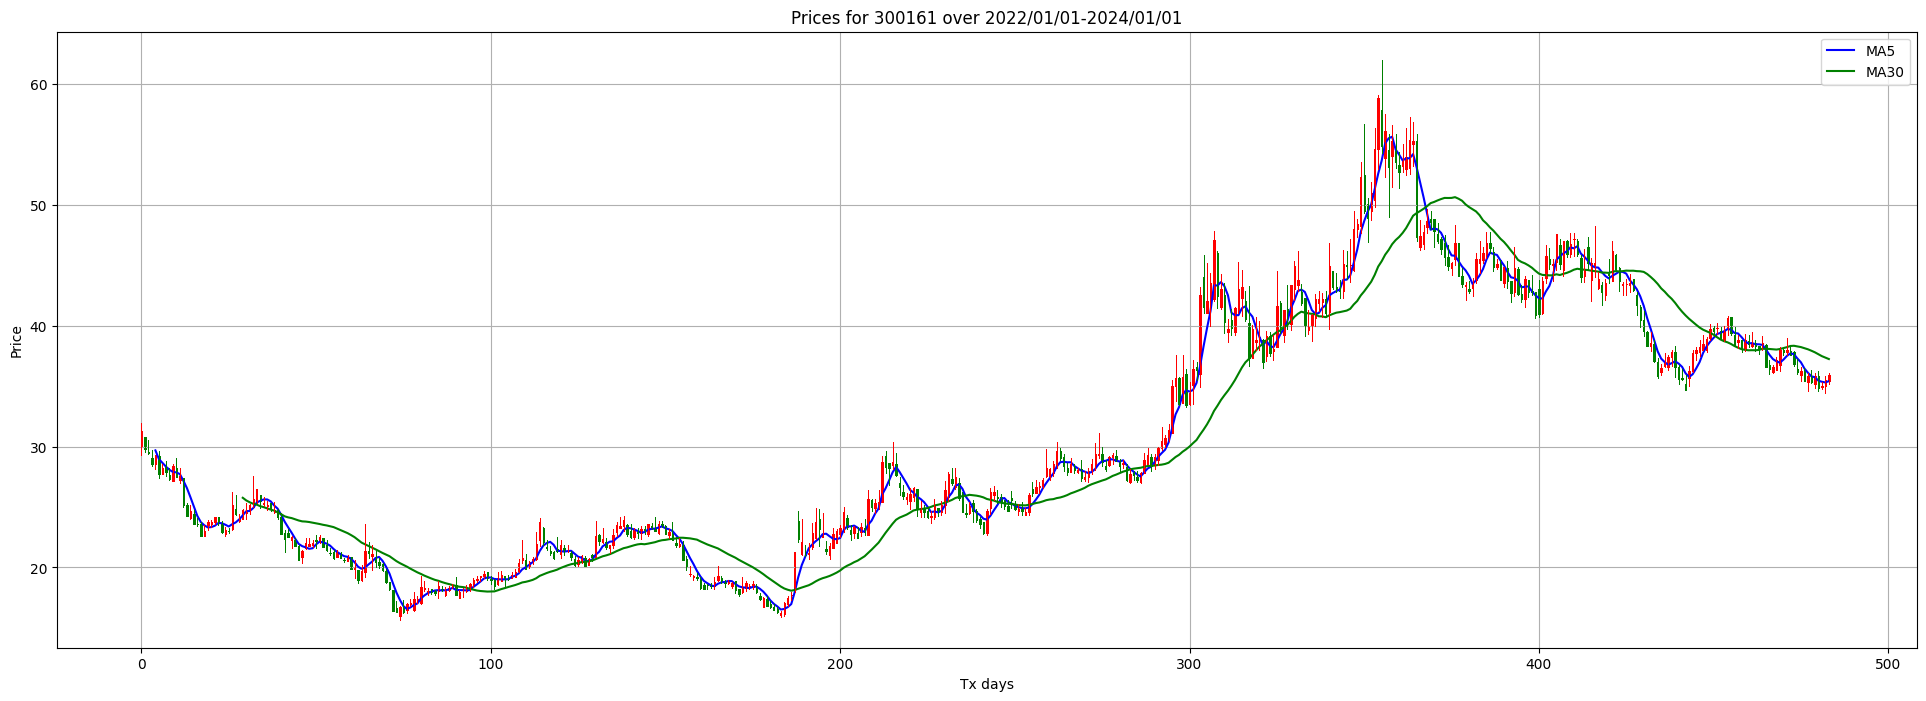

In [3]:
import talib
import mplfinance.original_flavor as mpf
import matplotlib.pyplot as plt
ma5 = talib.MA(df["收盘"],timeperiod=5)
ma30 = talib.MA(df["收盘"], timeperiod=30)
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(111)
ax.plot(ma5, label="MA5", color="blue")
ax.plot(ma30, label="MA30", color="green")
plt.legend()
plt.title("Prices for 300161 over 2022/01/01-2024/01/01")
plt.ylabel("Price")
plt.xlabel("Tx days")
mpf.candlestick2_ochl(ax, df["开盘"], df["收盘"], df["最高"], df["最低"], colorup="red", colordown="green", width=.4, alpha=1)
plt.grid()
plt.show()

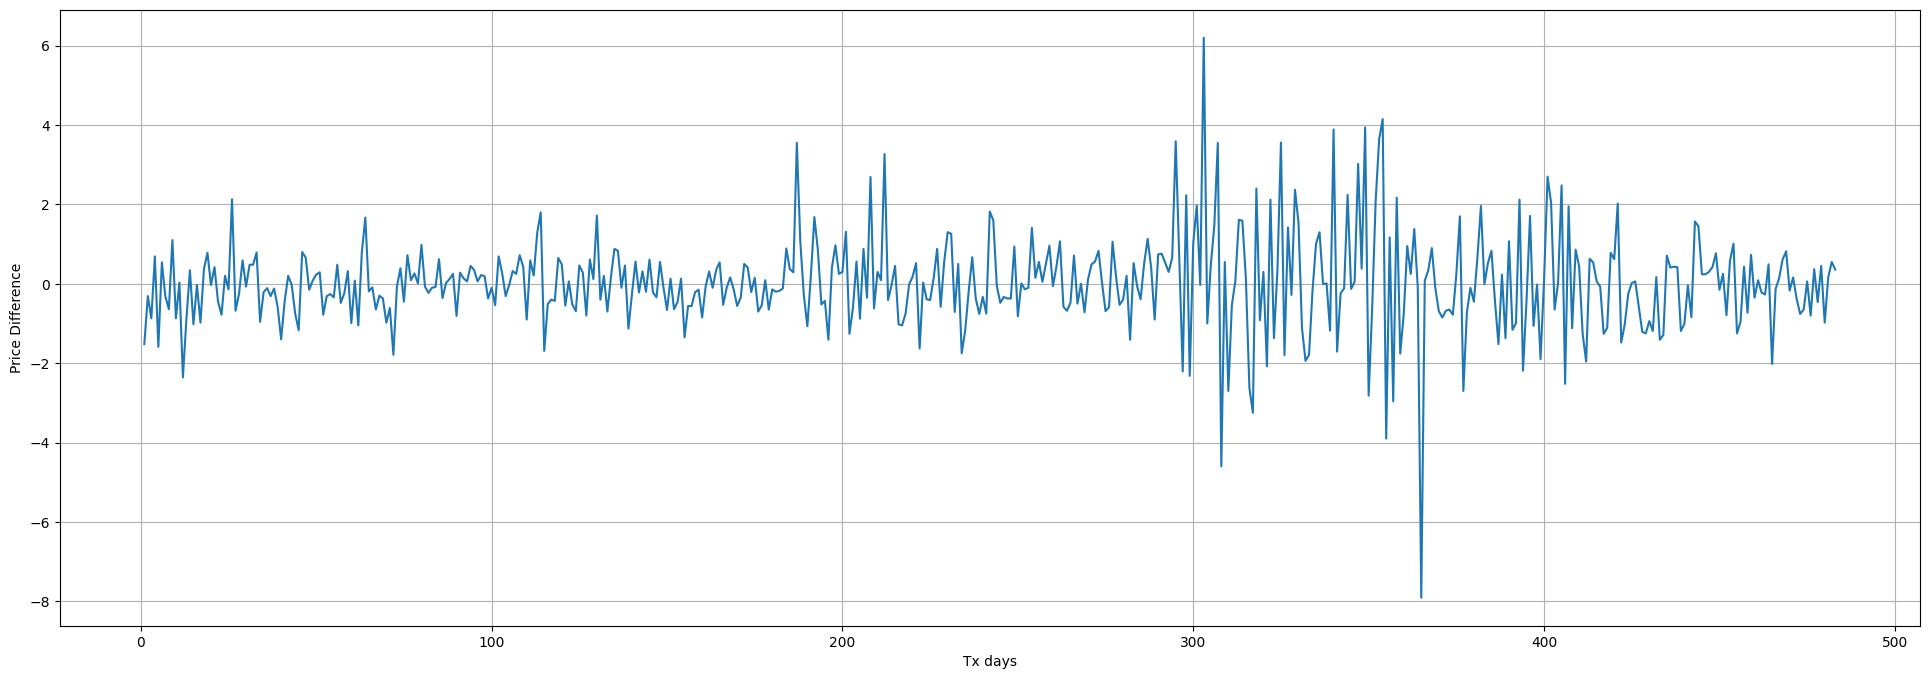

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
differencing = df["收盘"].diff().dropna()
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(111)
ax.plot(differencing)
plt.ylabel("Price Difference")
plt.xlabel("Tx days")
plt.grid()
plt.show()

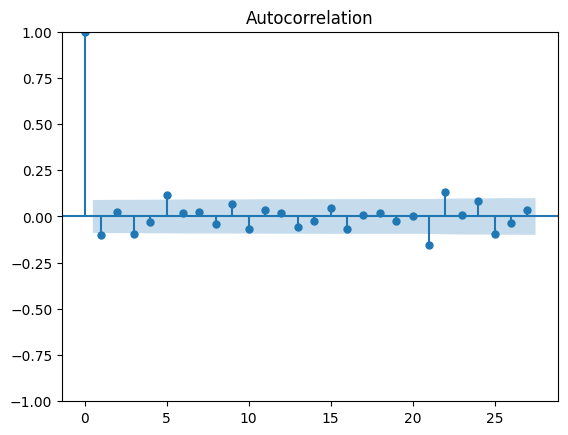

In [5]:
plot_acf(differencing)
plt.show()

可以看出，收盘价直接差分就有比较好的平稳性。但在300日后收盘价的差分波动程度相较之前明显增大，数据前后存在明显的异方差特性。下面我们进一步用对数差分方法对股价进行处理。

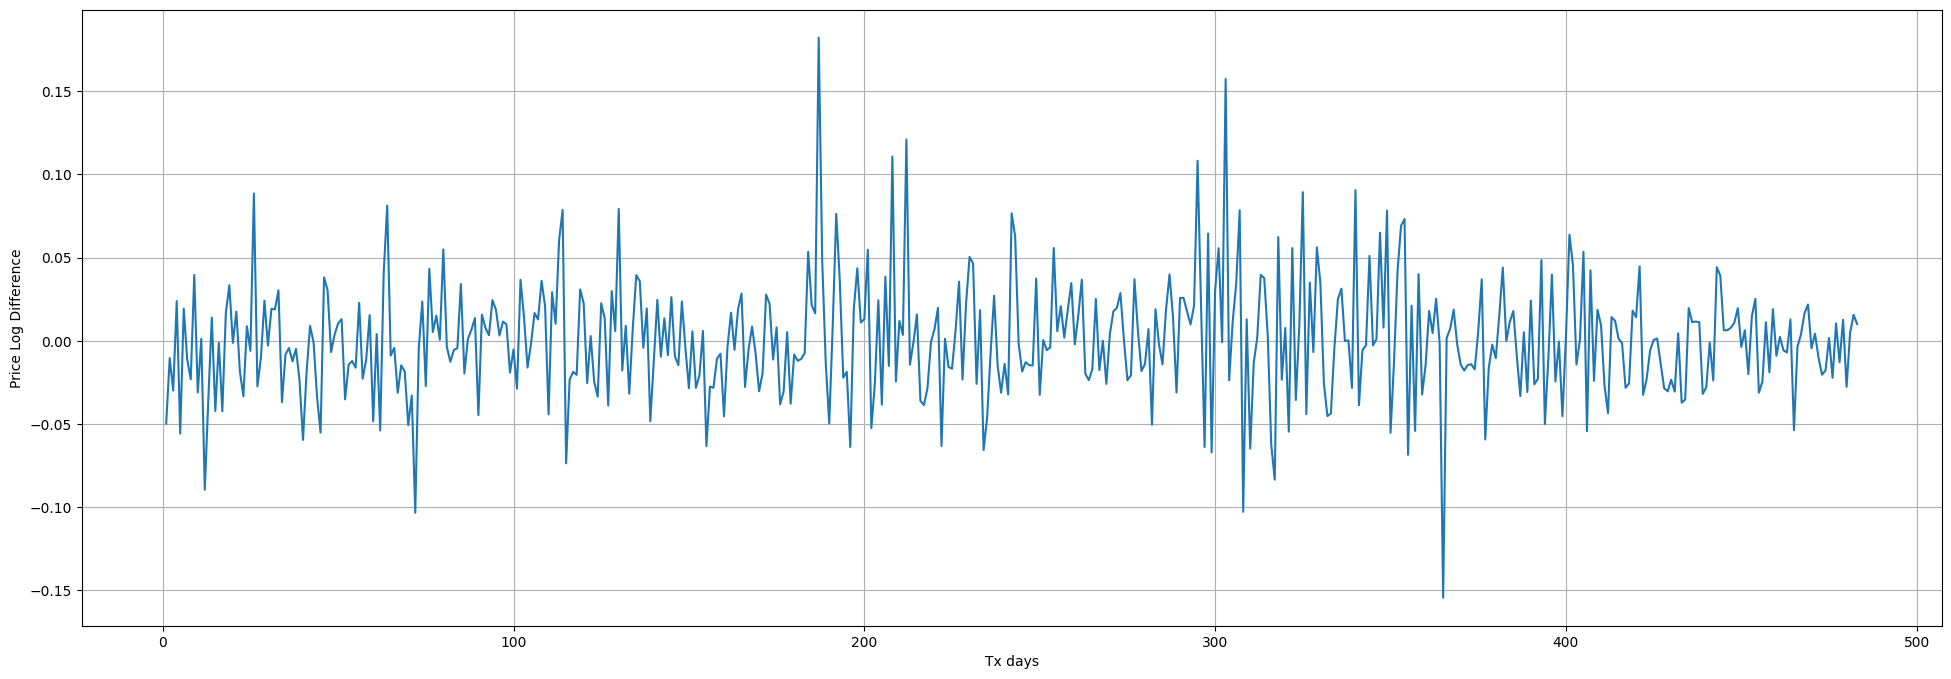

In [6]:
pdata = np.log(df["收盘"]).diff().dropna()
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(111)
ax.plot(pdata)
plt.ylabel("Price Log Difference")
plt.xlabel("Tx days")
plt.grid()
plt.show()

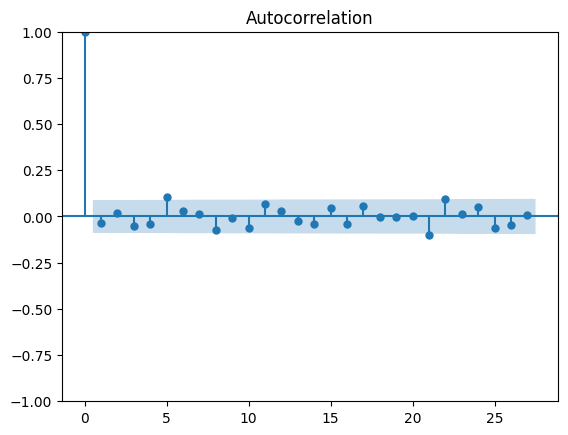

In [7]:
plot_acf(pdata)
plt.show()

数据的波动更为均匀，且自相关函数图像中，之前显著的时间差水平此时进一步衰减，数据的平稳性相较之前明显提高。实际上，股价的对数差分就是标的物的对数收益率，这里真实股价数据显示的平稳特性为我们假设对数收益率服从相互独立的正态分布提供了实证支撑。